# Portforlio Part 4 - Data Engineer Salary in 2024

***About Dataset***

This dataset provides insights into data engineer salaries and employment attributes for the year 2024. It includes information such as salary, job title, experience level, employment type, employee residence, remote work ratio, company location, and company size.

The dataset allows for analysis of salary trends, employment patterns, and geographic variations in data engineering roles. It can be used by researchers, analysts, and organizations to understand the evolving landscape of data engineering employment and compensation.

***Feature Description***




|Column|Meaning|
|:-----:|:-----:|
|work_year|The year in which the data was collected (2024)|
|experience_level|The experience level of the employee, SE (Senior Engineer), MI (Mid-Level Engineer), EL (Entry-Level Engineer)|
|employment_type|The type of employment, full-time (FT), part-time (PT), contract (C), freelance (F)|
|job_title|The title or role of the employee within the company (e.g., AI Engineer)|
|salary|The salary of the employee in the local currency (e.g., 202,730 USD)|
|salary_currency|The currency in which the salary is denominated (e.g., USD)|
|salary_in_usd|The salary converted to US dollars for standardization purposes|
|employee_residence|The country of residence of the employee|
|remote_ratio|The ratio indicating the extent of remote work allowed in the position (0 for no remote work, 1 for fully remote)|
|company_location|The location of the company where the employee is employed|
|company_size|The size of the company, small (S), medium (M), large (L)|

Complete the following requirements:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'salary' with other features. And ***select the variables*** that you think are helpful for predicting the salary. We do not limit the number of variables.

3. ***Split the dataset*** (Training set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'salary' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).


In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Explore the data

In [2]:
#Import dataset
data = pd.read_csv('salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [3]:
# Show first 5 columns
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [5]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [6]:
# Check for missing values
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# Check for duplicated rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16529    False
16530    False
16531    False
16532    False
16533    False
Length: 16534, dtype: bool

In [8]:
data.shape

(16534, 11)

# Studying feature correlation

In [9]:
# Check for numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


In [10]:
# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr()

In [11]:
# Display correlation with the target variable 'salary'
print(correlation_matrix['salary'].sort_values(ascending=False))

salary           1.000000
salary_in_usd    0.137666
remote_ratio     0.021025
work_year       -0.072814
Name: salary, dtype: float64


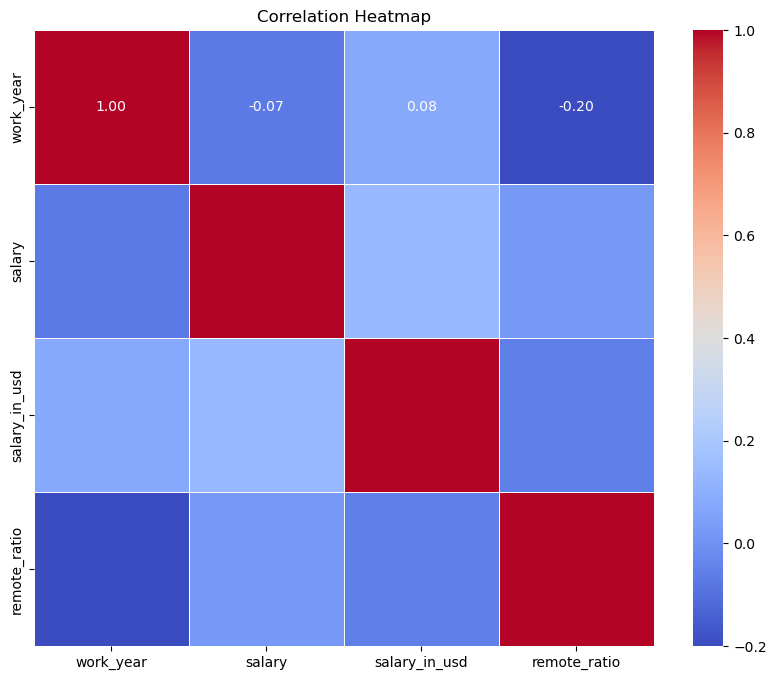

In [12]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Categorical columns to visualize
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

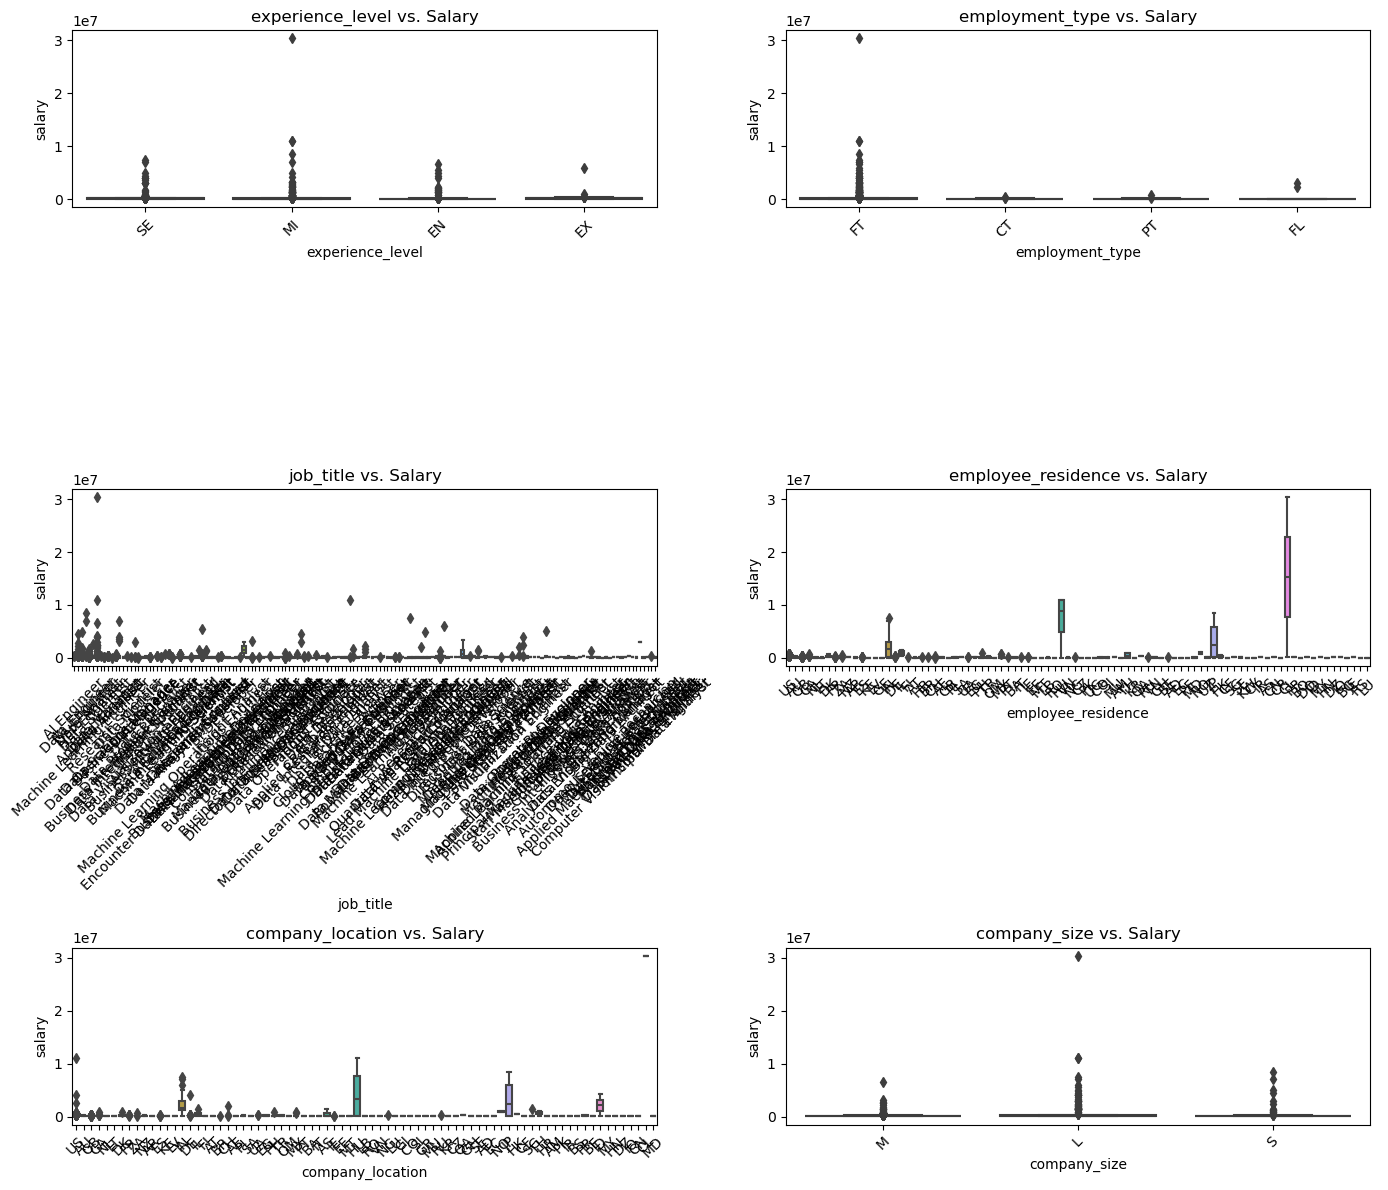

In [14]:
# Plot boxplots for categorical variables vs. salary
plt.figure(figsize=(14, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=column, y='salary', data=data)
    plt.title(f'{column} vs. Salary')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Split dataset

In [15]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['experience_level', 'job_title', 'company_location', 'company_size'])

In [16]:
# Map non-numeric values in 'employment_type' to numeric values
employment_type_mapping = {'FT': 0, 'CT': 1, 'PT': 2, 'FL': 3}
data_encoded['employment_type'] = data_encoded['employment_type'].map(employment_type_mapping)

In [17]:
# Map non-numeric values in 'employee_residence' to numeric values
employee_residence_mapping = {country: i for i, country in enumerate(data_encoded['employee_residence'].unique())}
data_encoded['employee_residence'] = data_encoded['employee_residence'].map(employee_residence_mapping)

In [18]:
# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = data_encoded['salary']

In [19]:
# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Display the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (13227, 243) (13227,)
Test set shape: (3307, 243) (3307,)


# Train a logistic regression model

In [23]:
# Initialize and train the logistic regression model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Accuracy score

In [25]:
# Predicting the target variable for test set
y_pred_test = logistic_reg_model.predict(X_test)

In [26]:
# Calculating the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

In [27]:
# Predicting the target variable for training set (for comparison)
y_pred_train = logistic_reg_model.predict(X_train)

In [28]:
# Calculating the accuracy of the model on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.021546836017237468
Test Accuracy: 0.022376776534623527


# Train a KNN model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Set k-value
knn_classifier_model = KNeighborsClassifier(n_neighbors=5)  # Setting K to 5 ad-hoc

In [31]:
# Train the KNN model
knn_classifier_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# Predictions
train_predictions_knn = knn_classifier_model.predict(X_train)
test_predictions_knn = knn_classifier_model.predict(X_test)

In [34]:
# Calculate accuracy
train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)
test_accuracy_knn = accuracy_score(y_test, test_predictions_knn)
print("Training Accuracy (KNN):", train_accuracy_knn)
print("Test Accuracy (KNN):", test_accuracy_knn)

Training Accuracy (KNN): 0.09903984274589854
Test Accuracy (KNN): 0.027517387360145147


# Visualizations

In [53]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc

In [60]:
# Calculate accuracy
accuracy = accuracy_score(y_test, test_predictions_knn)

In [54]:
# Calculate F-score
f_score = f1_score(y_test, test_predictions_knn, average='weighted')


In [56]:
y_scores = knn_classifier_model.predict_proba(X_test)

In [58]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1], pos_label='High Salary')
roc_auc = auc(fpr, tpr)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


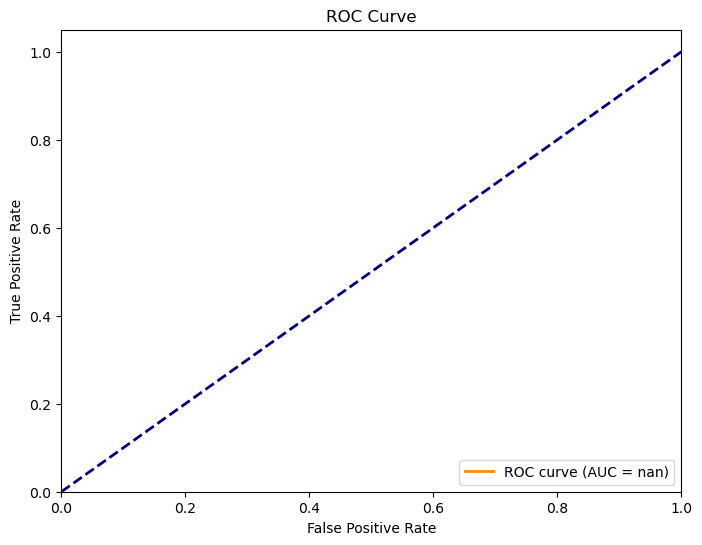

In [61]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [62]:
print("Accuracy:", accuracy)
print("F-score:", f_score)
print("AUC:", roc_auc)

Accuracy: 0.027517387360145147
F-score: 0.02227939587752686
AUC: nan


In [40]:
# Import library
from sklearn.model_selection import GridSearchCV

In [41]:
# Define parameter grid
param_grid = {'n_neighbors': range(1, 21)}

In [42]:
# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

In [43]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

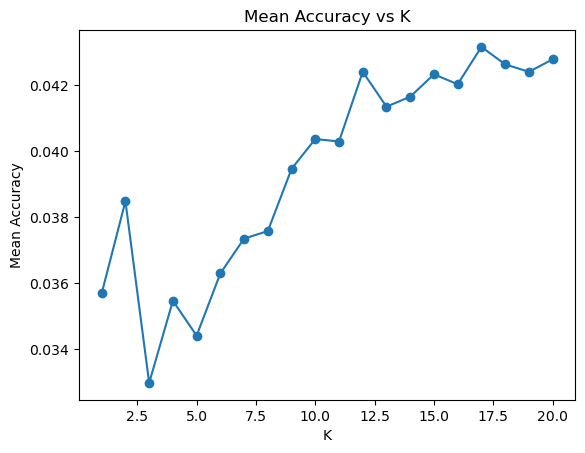

In [44]:
# Visualize results
results = grid_search.cv_results_
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('K')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs K')
plt.show()

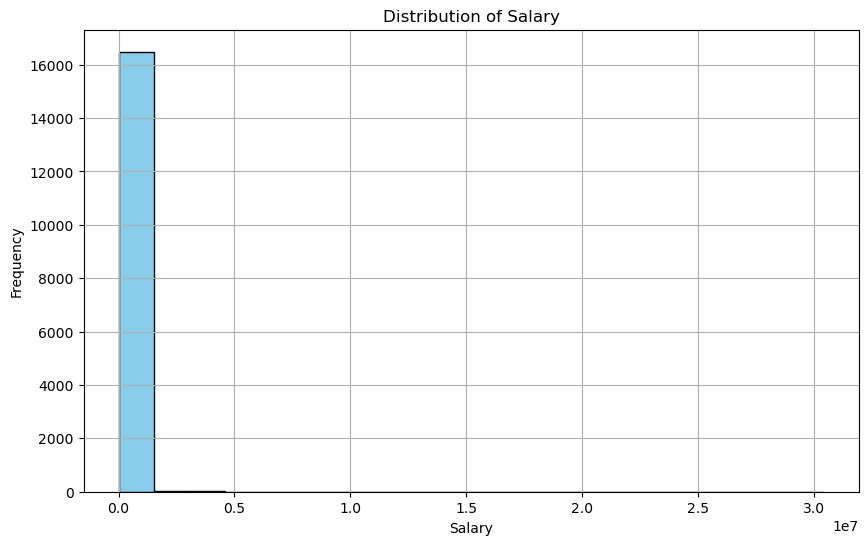

In [45]:
# Visualize the distribution of 'salary' using a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['salary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.grid(True)
plt.show()

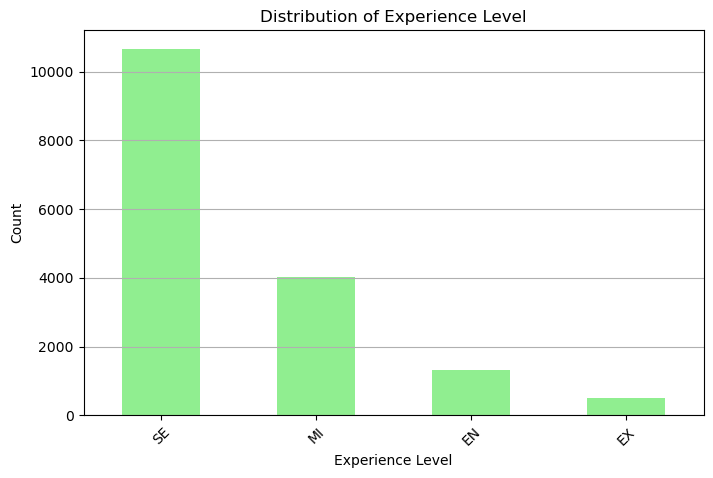

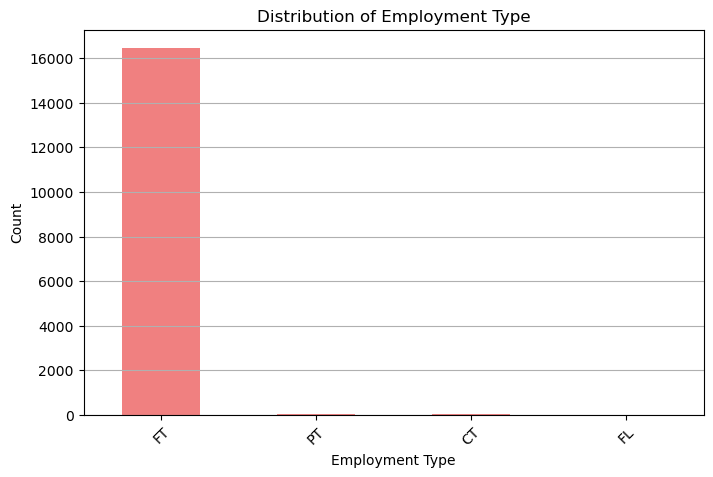

In [48]:
# Visualize the distribution of 'experience_level' using a bar plot
plt.figure(figsize=(8, 5))
data['experience_level'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience Level')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Visualize the distribution of 'employment_type' using a bar plot
plt.figure(figsize=(8, 5))
data['employment_type'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Distribution of Employment Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

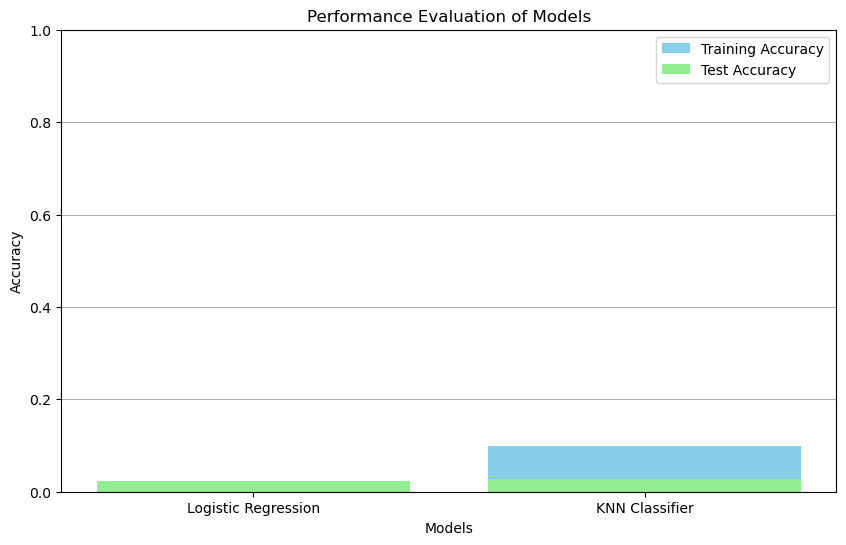

In [50]:
# Performance evaluation results for logistic regression and KNN models
models = ['Logistic Regression', 'KNN Classifier']
train_accuracies = [train_accuracy, train_accuracy_knn]
test_accuracies = [test_accuracy, test_accuracy_knn]

# Plotting training and test accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, color='skyblue', label='Training Accuracy')
plt.bar(models, test_accuracies, color='lightgreen', label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Performance Evaluation of Models')
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()